## 군집의 활용예시

고객분류 -> 고객을 클러스터링하여 추천시스템 등에 활용 

이상치 탐지 -> 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높음, 부정 거래 감지에 활용

준지도 학습*** -> 레이블된 샘플이 적다면 군집을 수행하여 같은 클러스터에 있는 모든 샘플에 전파할 수 있음

이미지 검색엔진 ->  제시된 이미지와 비슷한 이미지를 찾아줌 -> 비슷한 이미지와 동일한 클러스터에서 모든 이미지를 반환 

이미지 분할 -> 색을 기반으로 픽셀을 클러스터로 모읍니다

In [12]:
# 데이터
import pandas as pd

data=pd.read_csv("C:/Users/장세환/Documents/Test/prepared.csv", encoding='UTF-8')


In [24]:
X=data[['상품코드','노출(분)','판매단가','취급액','요일','시','주문량','월']]

X=X.dropna()

In [25]:
# k-means 

from sklearn.cluster import KMeans 

k = 5 # 클러스터의 개수 K 를 지정해야함

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


In [26]:
y_pred # 각 샘플을 0~4까지 클러스터에 할당함

array([3, 4, 4, ..., 1, 3, 3])

In [27]:
kmeans.cluster_centers_ # 알고리즘이 찾은 centroid 5개 

array([[2.01174151e+05, 1.71539500e+01, 2.50806516e+05, 3.31470243e+07,
        2.91357191e+00, 1.43362593e+01, 5.15684970e+02, 7.21877110e+00],
       [2.01113984e+05, 5.78207863e+00, 7.38445885e+05, 4.84279884e+06,
        3.06644316e+00, 1.46571167e+01, 4.11709211e+01, 7.23194148e+00],
       [2.01075268e+05, 2.06614786e+01, 3.03185798e+05, 8.11805875e+07,
        3.96108949e+00, 1.46692607e+01, 1.19127840e+03, 7.15953307e+00],
       [2.01106513e+05, 1.12920196e+01, 4.05376014e+05, 1.77511538e+07,
        2.98395007e+00, 1.36192599e+01, 2.18732199e+02, 7.13820776e+00],
       [2.01126312e+05, 1.91252700e+01, 2.12474730e+05, 5.17906479e+07,
        3.16198704e+00, 1.48747300e+01, 8.67573952e+02, 7.21922246e+00]])

In [28]:
X

,상품코드,노출(분),판매단가,취급액,요일,시,주문량,월
0,200981.0,20.0,119000.0,16517000.0,5.0,0.0,138.798319,6.0
1,200981.0,20.0,119000.0,44829000.0,5.0,0.0,376.714286,6.0
2,200981.0,20.0,119000.0,56057000.0,5.0,0.0,471.067227,6.0
3,201202.0,30.0,69000.0,9996000.0,5.0,1.0,144.869565,6.0
4,201206.0,0.0,69000.0,9409000.0,5.0,1.0,136.362319,6.0
...,...,...,...,...,...,...,...,...
8183,200739.0,0.0,648000.0,52265000.0,5.0,23.0,80.655864,8.0
8184,200945.0,20.0,178000.0,7047000.0,5.0,23.0,39.589888,8.0
8185,200944.0,0.0,178000.0,7551000.0,5.0,23.0,42.421348,8.0
8186,200945.0,20.0,178000.0,23624000.0,5.0,23.0,132.719101,8.0


In [30]:
X_new = np.array([[200981.0,20.0,119000.0,16517000.0,5.0,0.0,138.798319,6.0]])# 새로운 데이터 
kmeans.predict(X_new) # 예측한 클러스터

array([3])

## 하드 군집 hard clustering -> 샘플을 하나의 클러스터에 할당함

## 소프트 군집 soft clustering -> 샘플에 점수( ex 샘플과 센트로이드 사이의 거리 or 가우시안 방사기저 함수(similarity score))를 부여

In [31]:
kmeans.transform(X_new) # transform -> 샘플과 각 센트로이드 사이의 거리를 반환함

array([[16630546.64220424, 11690623.84624096, 64663849.87135562,
         1266943.91165646, 35273771.80921604]])

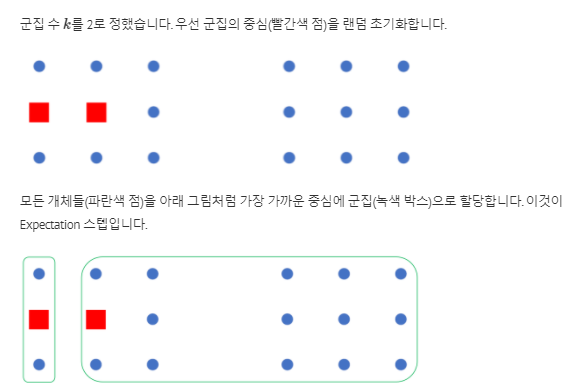

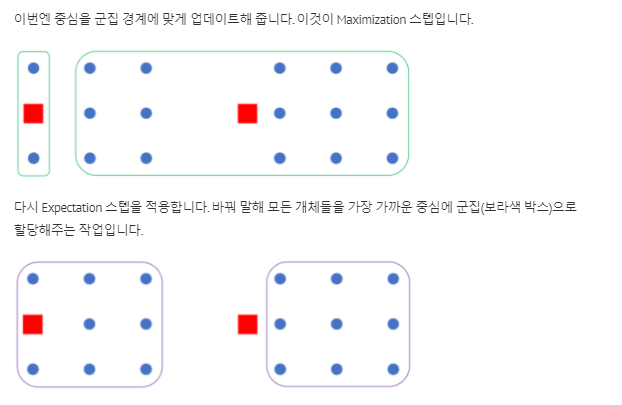

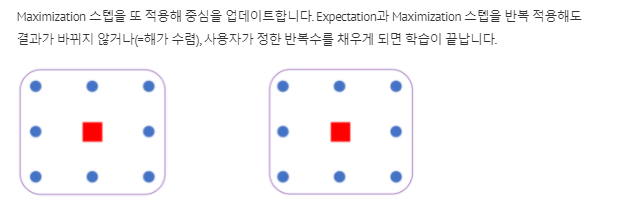


출처 : https://ratsgo.github.io/machine%20learning/2017/04/19/KC/

이 방법은 수렴하는 것이 보장되지만 최적의 솔루션으로 수렴하지 못할 수도 있음 

1. 다른 클러스터링 알고리즘을 먼저 실행해 센트로이드 위치를 설정함

2. 랜덤 초기화를 여러번하여 가장 좋은 솔루션을 선택함 

-> 성능지표 (최적의 k를 찾는데도 이용됨)

1) 이니셔(inertia) : 각 샘플과 가장 가까운 센트로이드 사이의 평균거리

2) 실루엣 점수(silhouette score) 

In [47]:
# 1. -> 센트로이드 지정해줌
# n_init를 1로 설정하고 센트로이드 담은 리스트를 넣어줌 


good_init = np.array([[200981.0,20.0,119000.0,16517000.0,5.0,0.0,138.798319,6.0],[200981.0,20.0,119000.0,16517000.0,5.0,0.0,138.798319,6.0],[200981.0,20.0,119000.0,16517000.0,5.0,0.0,138.798319,6.0],[200981.0,20.0,119000.0,16517000.0,5.0,0.0,138.798319,6.0],[200981.0,20.0,119000.0,16517000.0,5.0,0.0,138.798319,6.0]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init=1)
y_pred = kmeans.fit_predict(X)


In [48]:
# 2. n_init으로 랜덤 초기화 횟수를 조정할 수 있음, 기본값은 10이고 사이킷런은 이중에 최적의 솔루션을 반환함 (이니셔 기준 가장 낮은 모델)

# 모델의 이너셔값 
kmeans.inertia_

2.0859521711978765e+17

In [49]:
# score() -> 이니셔의 음수값 -> 사이킷런의 규칙이 '큰 값이 좋음' 을 만족시키기 위해 음수로 변환하여 큰값( 양수일떄 가장 작은 값이 좋으므로)을 반환 

kmeans.score(X)

-2.085952171197875e+17

## kmeans++ 알고리즘 -> 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤

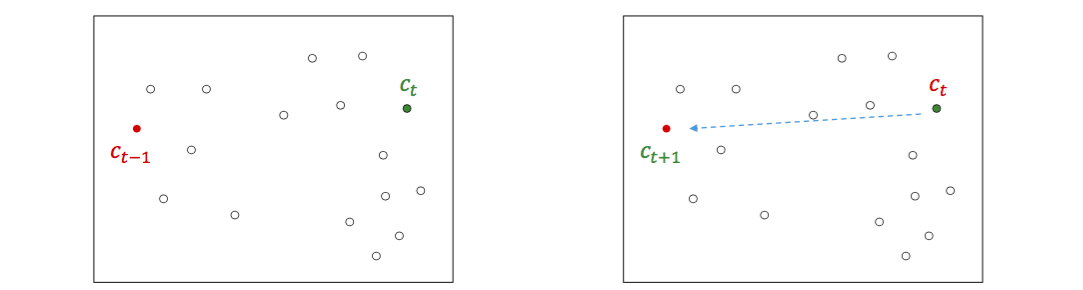

-> 멀리 떨어진 점 위주로 sentroid 선택한다

but kmeans++ 가 비효율적인 경우도 있는데 

1. 유클리드 디스턴스 기반이 적절하지 않을 경우 ex) 문서 군집화는 cosine distance가 더 적합함

2. c_t+1 를 고를때 c_t만 고려하기 때문에 c_t-1 등과 비슷해질 우려가 있음 



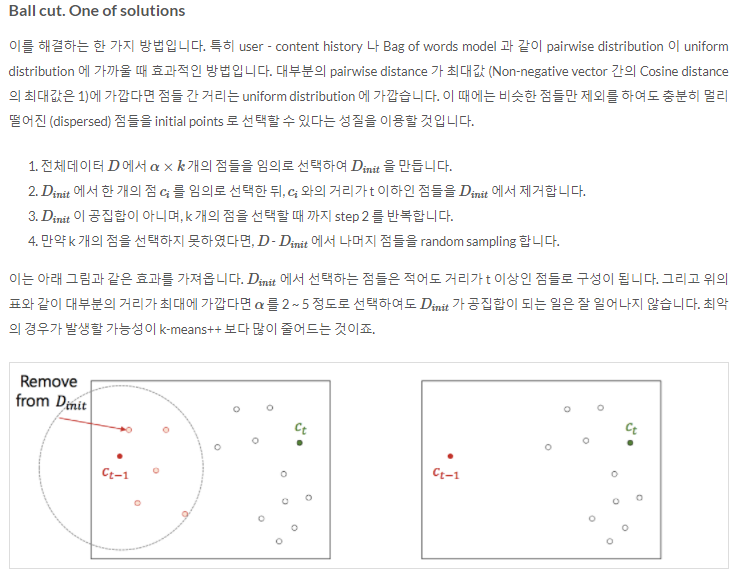

-> 성능은 비슷하나 계산비용이 적으면서 시간도 짧게 걸림

Ball cut. 코드 : https://github.com/lovit/clustering4docs

출처 : https://lovit.github.io/nlp/machine%20learning/2018/03/19/kmeans_initializer/

# 미니배치 k means

